# import classes from modules
Start by doing a reload 
 - so you can just rerun this cell every time you edit your code
 - rather than restarting the kernel

In [42]:
import numpy as np
from learned_rule_model import LearnedRuleModel
import importlib 
import greedy_rule_induction_model 
importlib.reload(greedy_rule_induction_model)
from greedy_rule_induction_model import GreedyRuleInductionModel

## load the iris data and split it into train/test
### This is just for development, your code will not be tested on the iris data

In [43]:
from  sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

#the iris data
from sklearn.datasets import load_iris
irisX,irisy = load_iris(return_X_y = True)
iris_train_X, iris_test_X, iris_train_y, iris_test_y = train_test_split(irisX,irisy, test_size=0.33, stratify=irisy )

iris_labels=['Setosa','Versicolor','Virginica']

# now create an object of my class, fit it to the training data, then test it on that data

In [44]:
myClassifier = GreedyRuleInductionModel(max_rules=5)
myClassifier.fit(iris_train_X,iris_train_y)

printing Rule Set: 
[]
(0, 4)
<class 'numpy.ndarray'>

printing thresholds:
[[4.3   4.436 4.572 4.708 4.844 4.98  5.116 5.252 5.388 5.524 5.66  5.796
  5.932 6.068 6.204 6.34  6.476 6.612 6.748 6.884 7.02  7.156 7.292 7.428
  7.564]
 [2.    2.096 2.192 2.288 2.384 2.48  2.576 2.672 2.768 2.864 2.96  3.056
  3.152 3.248 3.344 3.44  3.536 3.632 3.728 3.824 3.92  4.016 4.112 4.208
  4.304]
 [1.    1.224 1.448 1.672 1.896 2.12  2.344 2.568 2.792 3.016 3.24  3.464
  3.688 3.912 4.136 4.36  4.584 4.808 5.032 5.256 5.48  5.704 5.928 6.152
  6.376]
 [0.1   0.196 0.292 0.388 0.484 0.58  0.676 0.772 0.868 0.964 1.06  1.156
  1.252 1.348 1.444 1.54  1.636 1.732 1.828 1.924 2.02  2.116 2.212 2.308
  2.404]]


beta: 0 | Feature: [6.4 2.9 4.3 1.3] threshold: 4.3 Label: 1 
<class 'numpy.float64'>    <class 'numpy.float64'>    <class 'numpy.int64'>


beta: 1 | Feature: [6.3 2.7 4.9 1.8] threshold: 4.436 Label: 2 
<class 'numpy.float64'>    <class 'numpy.float64'>    <class 'numpy.int64'>


beta: 2 | F

The model's predictions were:
 [999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
 999 999 999 999 999 999 999 999 999 999].

Accuracy on training set is 0.0%.



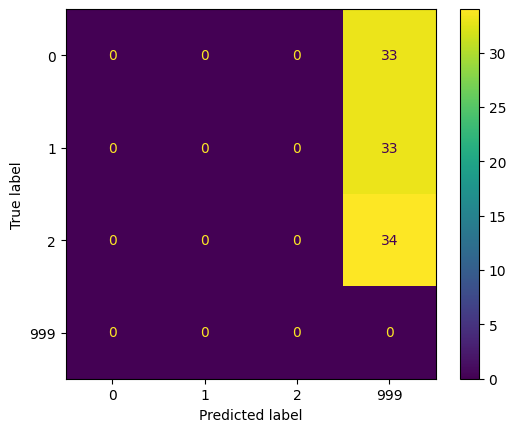

In [45]:
train_predictions= myClassifier.predict(iris_train_X)
print(f"The model's predictions were:\n {train_predictions}.\n")
accuracy = 100* (train_predictions==iris_train_y).sum() / len(iris_train_y)

print(f'Accuracy on training set is {accuracy}%.\n')
_=ConfusionMatrixDisplay.from_predictions(iris_train_y,train_predictions)

## What's in our model?
### first the learned rule set

In [46]:
print(myClassifier.get_rule_set())

myClassifier.print_rule_set()

[]
	 Empty Model - No rules learned


### and here's all the model contents in case it is useful

In [47]:

for key,val in myClassifier.__dict__.items():
        print(f' {key} : {val}')
    
    

 max_rules : 5
 num_thresholds : 25
 rule_set : []
 operator_set : ('<', '==', '>')
 default_prediction : 2
 labels : [0 1 2]
 num_classes : 3
 num_features : 4
 thresholds : [[4.3   4.436 4.572 4.708 4.844 4.98  5.116 5.252 5.388 5.524 5.66  5.796
  5.932 6.068 6.204 6.34  6.476 6.612 6.748 6.884 7.02  7.156 7.292 7.428
  7.564]
 [2.    2.096 2.192 2.288 2.384 2.48  2.576 2.672 2.768 2.864 2.96  3.056
  3.152 3.248 3.344 3.44  3.536 3.632 3.728 3.824 3.92  4.016 4.112 4.208
  4.304]
 [1.    1.224 1.448 1.672 1.896 2.12  2.344 2.568 2.792 3.016 3.24  3.464
  3.688 3.912 4.136 4.36  4.584 4.808 5.032 5.256 5.48  5.704 5.928 6.152
  6.376]
 [0.1   0.196 0.292 0.388 0.484 0.58  0.676 0.772 0.868 0.964 1.06  1.156
  1.252 1.348 1.444 1.54  1.636 1.732 1.828 1.924 2.02  2.116 2.212 2.308
  2.404]]


## Now let's see how good it is on unseen data

In [48]:
test_predictions = myClassifier.predict(iris_test_X)

### lets look at what it predicted:
- 'raw' labels
- accuracy
- confusion matrix

 the labels predicted were:
 [999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999 999
 999 999 999 999 999 999 999 999 999 999 999 999 999 999]
 Test accuracy is 0.0


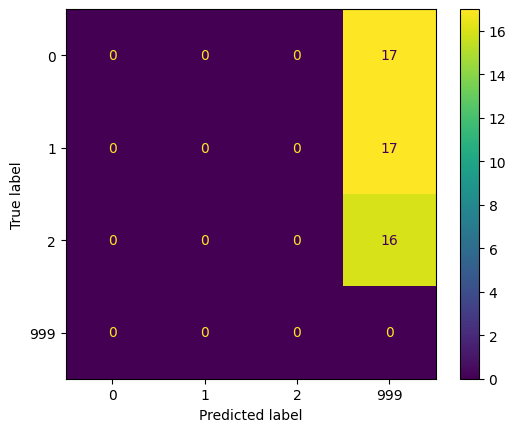

In [49]:
print(f' the labels predicted were:\n {test_predictions}')

accuracy= 100* (test_predictions==iris_test_y).sum()/ len(test_predictions)

print (f' Test accuracy is {accuracy}')

_=ConfusionMatrixDisplay.from_predictions(iris_test_y,test_predictions)